In [30]:
import seaborn as sns
import matplotlib as mpl
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
# from scipy.optimize import curve_fit
%run loading_tissue
%run score_cc_finding

In [38]:
save_dir='Figures'
mpl.style.use('seaborn')
sns.set_style('whitegrid')
present_dir= '..\Presentations\Compare'
rc_pars = {'legend.facecolor': 'white', 'legend.framealpha': 0.85, "lines.linewidth": 3,
                            'legend.edgecolor':'Black', 'legend.frameon': True,
                            'legend.fancybox': True, 'legend.shadow': False,
                             'figure.figsize': [10, 7],'figure.dpi': 300}
                            # 'axes.labelsize': 28, 'xtick.labelsize': 24, 'font.size': 28,
                            # 'ytick.labelsize': 24, 'axes.titlesize': 28,
                            # 'legend.title_fontsize':22, 'legend.fontsize': 22})
sns.set_context('talk',  rc=rc_pars )

In [70]:
tissue_name = 'Liver' 
tissue_name = 'Heart' 
meth = 'facs'
# meth = 'droplet'
ad = load_tissue_as_ad(tissue_name, method=meth)
# ad = preprocess_ad(ad)

c:\Users\ronse\Anaconda3\lib\site-packages\anndata\compat\__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
c:\Users\ronse\Anaconda3\lib\site-packages\anndata\compat\__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [48]:
load_gene_list(glist_name=glists_for_comp[2])

phase
symbol      
MCM5    G1/S
PCNA    G1/S
TYMS    G1/S
FEN1    G1/S
MCM2    G1/S
...      ...
NEK2    G2/M
G2E3    G2/M
GAS2L3  G2/M
CBX5    G2/M
CENPA   G2/M

[98 rows x 1 columns]

In [50]:
gls 

Phase
Gene         
ABCA7    G1/S
ACD      G1/S
ACYP1    G1/S
ADAMTS1  G1/S
ADCK2    G1/S
...       ...
ZFAS1    M/G1
ZNF24    M/G1
ZNFX1    M/G1
ZPBP     M/G1
ZSCAN5A  M/G1

[774 rows x 1 columns]

In [56]:
A

aa   bb   cc
(G1/S,)  1.0  0.0  1.0
(G1/S,)  1.0  0.0  1.0
(G1/S,)  1.0  0.0  1.0
(G1/S,)  1.0  0.0  1.0
(G1/S,)  1.0  0.0  1.0
...      ...  ...  ...
(S,)     1.0  0.0  0.0
(S,)     1.0  0.0  0.0
(S,)     1.0  0.0  0.0
(S,)     1.0  0.0  0.0
(S,)     1.0  0.0  0.0

[5941 rows x 3 columns]

In [59]:
gls[gls.Phase.isin(phases_list)].index

Index(['MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2',
       'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'MLF1IP', 'HELLS', 'RFC2',
       'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2', 'UBR7',
       'POLD3', 'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1',
       'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B',
       'BRIP1', 'E2F8'],
      dtype='object', name='Symbol')

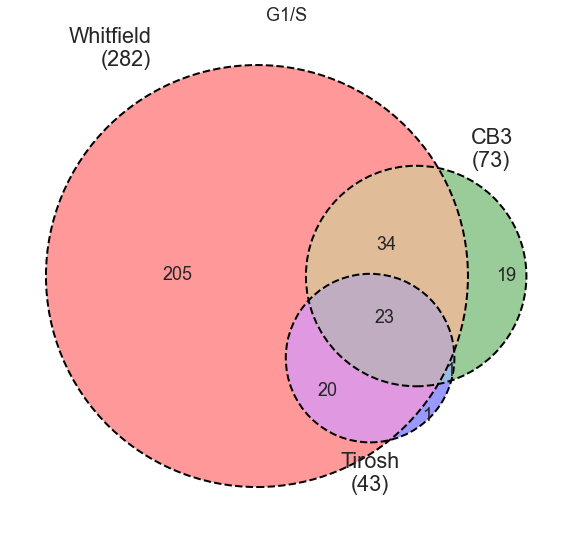

In [66]:
glists_fname_dicts.update({'Tirosh': 'Tirosh et al, 2016.xlsx'})
glists = list(glists_fname_dicts.keys())
phases_list = ['G1/S','S']
# phases_list = ['G2/M','M', 'G2']
A = pd.DataFrame()
glists_for_comp = [glists[i] for i in [0,3,4]]
ns = []
for col, glist_name in zip(['aa', 'bb', 'cc'], glists_for_comp):
    # print(glist_name)
    gls = load_gene_list(glist_name=glist_name)
    A = A.join(pd.DataFrame(1, index=gls[gls.Phase.isin(phases_list)].index, columns=[col]), how='outer')
    ns.append(gls.Phase.isin(phases_list).sum())
A = A.fillna(0)

sets_sizes = []
sets_sizes.append((A.aa *(1-A.bb) * (1-A.cc)).sum())
sets_sizes.append(((1-A.aa) *A.bb * (1-A.cc)).sum())
sets_sizes.append((A.aa *A.bb * (1-A.cc)).sum())
sets_sizes.append(((1-A.aa) *(1-A.bb)* A.cc).sum())
sets_sizes.append((A.aa*(1-A.bb)* A.cc).sum())
sets_sizes.append(((1-A.aa) *A.bb* A.cc).sum())
sets_sizes.append((A.aa*A.bb* A.cc).sum())
sets_sizes = [int(a) for a in sets_sizes]
plt.figure(figsize=(10,10))
# sets_labels = ['{}\n({})'.format(gl, load_gene_list(glist_name=gl).shape[0]) for gl in glists_for_comp]
sets_labels = ['{}\n({})'.format(gl, ns[i]) for i, gl in enumerate(glists_for_comp)]
v = venn3(subsets=sets_sizes, 
          set_labels=sets_labels)
# add outline
venn3_circles(sets_sizes, 
              linestyle="dashed", linewidth=2)
plt.title(phases_list[0])
plt.savefig('{}/genelists_intersections_phase={}.png'.format(present_dir,phases_list[0].replace('/','_')))
# assign title

In [ ]:
in_Wf_above = cc_genes_Wf_red[cc_genes_Wf_red['above']].index.unique()

# A = pd.DataFrame(1,index=in_aa, columns=['aa'])
A = pd.DataFrame(1,index=df_red.columns, columns=['aa'])
# A.aa = 1
in_liu = ad.var_names[ad.var_names.isin(cc_score_genes.index)]
# A = A.join(pd.DataFrame(1, index=genes_in_bb, columns=['bb']), how='outer')
A = A.join(pd.DataFrame(1, index=in_liu, columns=['bb']), how='outer')
# A = A.join(pd.DataFrame(1, index=in_Wf_above, columns=['cc']), how='outer')

A = A.join(pd.DataFrame(1, index=df_red_mix.columns, columns=['cc']), how='outer')
A = A.fillna(0)
# A['bb'] = pd.DataFrame(1, index=genes_in_bb, columns=['bb'])
A.sum()
sets_sizes = []
sets_sizes.append((A.aa *(1-A.bb) * (1-A.cc)).sum())
sets_sizes.append(((1-A.aa) *A.bb * (1-A.cc)).sum())
sets_sizes.append((A.aa *A.bb * (1-A.cc)).sum())
sets_sizes.append(((1-A.aa) *(1-A.bb)* A.cc).sum())
sets_sizes.append((A.aa*(1-A.bb)* A.cc).sum())
sets_sizes.append(((1-A.aa) *A.bb* A.cc).sum())
sets_sizes.append((A.aa*A.bb* A.cc).sum())


#import module
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
# depict venn diagram
# sets_labels = ['aa', 'Cyclebase3.0', 'whitfield>0.5.']
sets_labels = ['GO', 'Liu', 'whitfield>0.5.']
v = venn3(subsets=sets_sizes, 
          set_labels=sets_labels)
# add outline
venn3_circles(sets_sizes, 
              linestyle="dashed", linewidth=2)
  
# assign title
plt.title("Cycle genes")
plt.show()

## reveresing 

In [ ]:
Z = ad.X.toarray()
ZZ = Z[:1000, :]
c_sum = 10000
N = Z.shape[0]
def func(a, w):
    return sum(w**a) - c_sum - N
factors = [fsolve(func, x0=1, args=np.exp(ZZ[i,:])) for i in range(ZZ.shape[0])]
aa = np.array(factors).squeeze()
YY = aa[:, np.newaxis] * ZZ
XX = np.exp(YY) - 1